# Install

In [1]:
!pip install biodivine_aeon==1.3.0a3 -qq > /dev/null 2>&1
!pip install SPARQLWrapper networkx matplotlib -qq > /dev/null 2>&1
!apt-get install graphviz graphviz-dev -y -qq > /dev/null 2>&1
!pip install pygraphviz -qq > /dev/null 2>&1

# Import

In [2]:
from biodivine_aeon import *

In [3]:
from EnrichmentClasses import (EnrichmentPSBN)

In [4]:
from Visualization import (
    get_quickgo_terms_batch,
    set_nodes_for_graph,
    make_graph,
    visualize_subgraphs,
    get_roots_and_leafs,
    sort_roots_and_leafs,
    visualize_subgraphs_on_whole_net,
    print_roots_and_leafs_on_whole_net,
    visualize_subgraphs_on_each_instance,
    print_roots_and_leafs_per_instance,
    visualize_unmapped_nodes_frequencies,
    visualize_mapped_nodes_frequencies,
)

In [5]:
from Pipeline import pipeline

In [6]:
from CheckFixedPoints import print_fixed_points_on_new_stg

# Data + reference genome

In [7]:
network = BooleanNetwork.from_file("mapk-unspecified.aeon")

In [8]:
human_id = "9606"

# Case study

In [9]:
psbn = EnrichmentPSBN([])
pipeline(psbn, network, human_id, "mapk")

Number or instances and number of attractors

In [10]:
print(f"Number of instances: {len(psbn.instances)}")
print(f"Number of attractors: {psbn.count_attractors()}")

Number of instances: 16
Number of attractors: 18


## Unmapped ids

Unmapped ids includes besides others even phenotypes - output nodes of pathway - such as Apoptosis, Proliferation, Growth_Arrest. When some of them occures it means that it is the cell fate of that attractor.

I restricted visualization only to output nodes.
full version is avaiable under method:
***psbn.print_unmapped_ids_per_instance_per_attractor()***

In [11]:
output_nodes = {"Apoptosis", "Proliferation", "Growth_Arrest"}

In [12]:
psbn.print_only_output_unmapped_ids_per_instance_per_attractor(output_nodes)

0: ColorModel({'DNA_damage': 'false', 'EGFR_stimulus': 'false', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'})
[] [0]
[] [1]
---------
1: ColorModel({'DNA_damage': 'true', 'EGFR_stimulus': 'false', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'})
['Growth_Arrest', 'Apoptosis'] [0]
['Growth_Arrest', 'Apoptosis'] [1]
---------
2: ColorModel({'DNA_damage': 'false', 'EGFR_stimulus': 'true', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'})
[] [0]
---------
3: ColorModel({'DNA_damage': 'true', 'EGFR_stimulus': 'true', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'})
['Growth_Arrest', 'Apoptosis'] [0]
---------
4: ColorModel({'DNA_damage': 'false', 'EGFR_stimulus': 'false', 'FGFR3_stimulus': 'true', 'TGFBR_stimulus': 'false'})
[] [0]
---------
5: ColorModel({'DNA_damage': 'true', 'EGFR_stimulus': 'false', 'FGFR3_stimulus': 'true', 'TGFBR_stimulus': 'false'})
['Growth_Arrest', 'Apoptosis'] [0]
---------
6: ColorModel({'DNA_damage': 'false', 'EGFR_stimulus': 'true', 'F

We can also see output nodes frequenies per each instance

In [13]:
for i, instance in enumerate(psbn.instances):
  unmapped_ids_freqs = instance.count_unmapped_ids_frequencies()
  output_unmapped_ids_freqs = {node: frequency
                             for node, frequency in unmapped_ids_freqs.items()
                             if node in output_nodes}
  print(f"[{i}] {instance.color}:\nNumber of attractors: {len(instance.attractors)}\n{output_unmapped_ids_freqs}\n---------")

[0] ColorModel({'DNA_damage': 'false', 'EGFR_stimulus': 'false', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'}):
Number of attractors: 2
{}
---------
[1] ColorModel({'DNA_damage': 'true', 'EGFR_stimulus': 'false', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'}):
Number of attractors: 2
{'Growth_Arrest': 2, 'Apoptosis': 2}
---------
[2] ColorModel({'DNA_damage': 'false', 'EGFR_stimulus': 'true', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'}):
Number of attractors: 1
{}
---------
[3] ColorModel({'DNA_damage': 'true', 'EGFR_stimulus': 'true', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'}):
Number of attractors: 1
{'Growth_Arrest': 1, 'Apoptosis': 1}
---------
[4] ColorModel({'DNA_damage': 'false', 'EGFR_stimulus': 'false', 'FGFR3_stimulus': 'true', 'TGFBR_stimulus': 'false'}):
Number of attractors: 1
{}
---------
[5] ColorModel({'DNA_damage': 'true', 'EGFR_stimulus': 'false', 'FGFR3_stimulus': 'true', 'TGFBR_stimulus': 'false'}):
Number of attractors: 1
{'Gr

We can see frequencies of the output nodes across all instances

In [14]:
print(f"Total numbers of attractors: {psbn.count_attractors()}")
unmapped_ids_freqs = psbn.count_unmapped_ids_frequencies_in_all_instances()
output_unmapped_ids_freqs = {node: frequency
                             for node, frequency in unmapped_ids_freqs.items()
                             if node in output_nodes}
output_unmapped_ids_freqs

Total numbers of attractors: 18


{'Growth_Arrest': 13, 'Apoptosis': 13}

There is any unmapped id present in every attractor across instances

In [15]:
psbn.unmapped_ids_intersection_on_all_instances()

set()

Intersection of unmapped ids on each instance - there is apoptosis and growth_arrest output node (part of unmapped ids) in every of attractor of most instances

In [16]:
for instance in psbn.instances:
  print(f"{instance.unmapped_ids_intersection()}")

set()
{'Growth_Arrest', 'CREB', 'Apoptosis', 'JNK', 'MSK', 'TAOK', 'DNA_damage'}
{'PI3K', 'EGFR_stimulus'}
{'Growth_Arrest', 'CREB', 'Apoptosis', 'JNK', 'MSK', 'PI3K', 'TAOK', 'DNA_damage', 'EGFR_stimulus'}
{'FGFR3_stimulus', 'PI3K'}
{'Growth_Arrest', 'FGFR3_stimulus', 'CREB', 'Apoptosis', 'JNK', 'MSK', 'PI3K', 'TAOK', 'DNA_damage'}
{'FGFR3_stimulus', 'PI3K', 'EGFR_stimulus'}
{'Growth_Arrest', 'FGFR3_stimulus', 'CREB', 'Apoptosis', 'JNK', 'MSK', 'PI3K', 'TAOK', 'DNA_damage', 'EGFR_stimulus'}
{'Growth_Arrest', 'TGFBR_stimulus', 'SMAD', 'CREB', 'TGFBR', 'Apoptosis', 'JNK', 'MSK', 'RAS', 'SOS', 'PI3K', 'MAP3K1_3'}
{'Growth_Arrest', 'TGFBR_stimulus', 'SMAD', 'CREB', 'TGFBR', 'Apoptosis', 'JNK', 'MSK', 'RAS', 'PI3K', 'SOS', 'TAOK', 'DNA_damage', 'MAP3K1_3'}
{'Growth_Arrest', 'TGFBR_stimulus', 'SMAD', 'CREB', 'TGFBR', 'Apoptosis', 'MAP3K1_3', 'JNK', 'MSK', 'RAS', 'SOS', 'PI3K', 'EGFR_stimulus'}
{'Growth_Arrest', 'TGFBR_stimulus', 'SMAD', 'CREB', 'TGFBR', 'Apoptosis', 'MAP3K1_3', 'JNK', 'MSK'

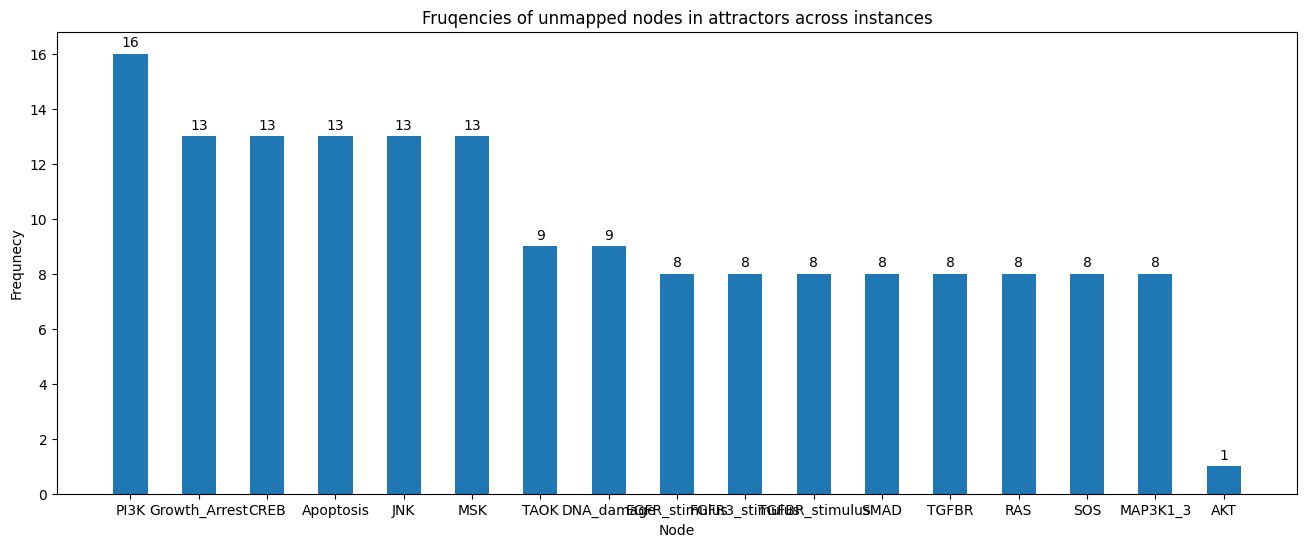

In [17]:
visualize_unmapped_nodes_frequencies(psbn)

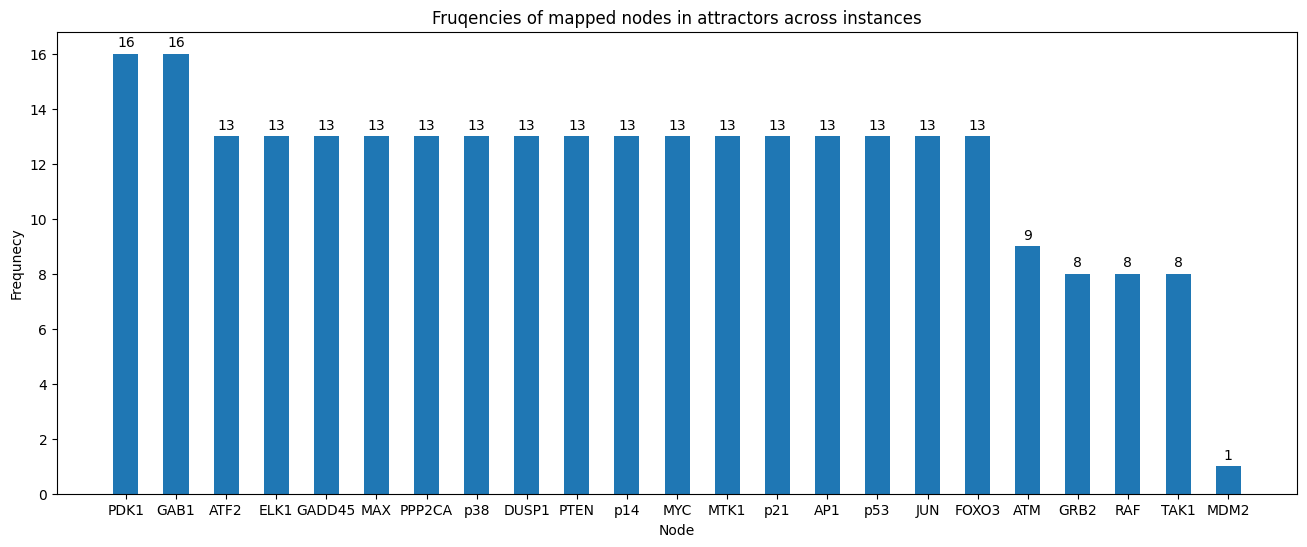

In [18]:
visualize_mapped_nodes_frequencies(psbn)

## Terms frequencies

These are 10 the most frequent GO terms counted on each attractor of the PSBN (restricted to 10, there is 340 of them)

In [19]:
frequencies = psbn.count_goterms_frequencies_in_all_instances()
sorted_frequences = sorted(frequencies.items(), key=lambda item: item[1], reverse=True)
print(f"In total number of attractors: {psbn.count_attractors()}, 10 most frequent terms are:")
for term, frequency in sorted_frequences[:10]:
  print(f"{term}: {frequency}")

In total number of attractors: 18, 10 most frequent terms are:
+intracellular signal transduction: 13
+response to abiotic stimulus: 13
+signal transduction in response to DNA damage: 13
+negative regulation of nucleobase-containing compound metabolic process: 13
+response to radiation: 13
+cellular response to ionizing radiation: 13
+cellular response to gamma radiation: 13
+cellular response to radiation: 13
+regulation of nucleobase-containing compound metabolic process: 13
+cellular response to abiotic stimulus: 13


## Graphs

To visualize a graph I need to:

1.   compute an intersection of GO terms on whole net
2.   set a graph structure on it (assign parent and child relationships between them)
3.   get roots and leafs of graph sorted by FDR (false discovery rate)
4.   make subgraphs of graph per each root



Because the intersection of the GO terms is empty, the resulting network graphs, along with its roots and leaves, are empty

In [20]:
psbn.goterms_intersection_on_all_instances()

{}

In [21]:
visualize_subgraphs_on_whole_net(psbn)

In [22]:
print_roots_and_leafs_on_whole_net(psbn)

0 leafs: []
0 roots: []


To visualize graphs per instance it is basically same as for whole net, but done on level of a single instance.

I restricted visualization only on the 1. root per instance in this notebook to avoid visualizing bunches of graphs.

Instances number 0, 2, 4, 6 were empty and the first subgraphs of other instances were similar to number 5 and 15 so i chose them as representative ones.


Full results: available under the function:
***visualize_subgraphs_on_each_instance(psbn)***

[5] ColorModel({'DNA_damage': 'true', 'EGFR_stimulus': 'false', 'FGFR3_stimulus': 'true', 'TGFBR_stimulus': 'false'})


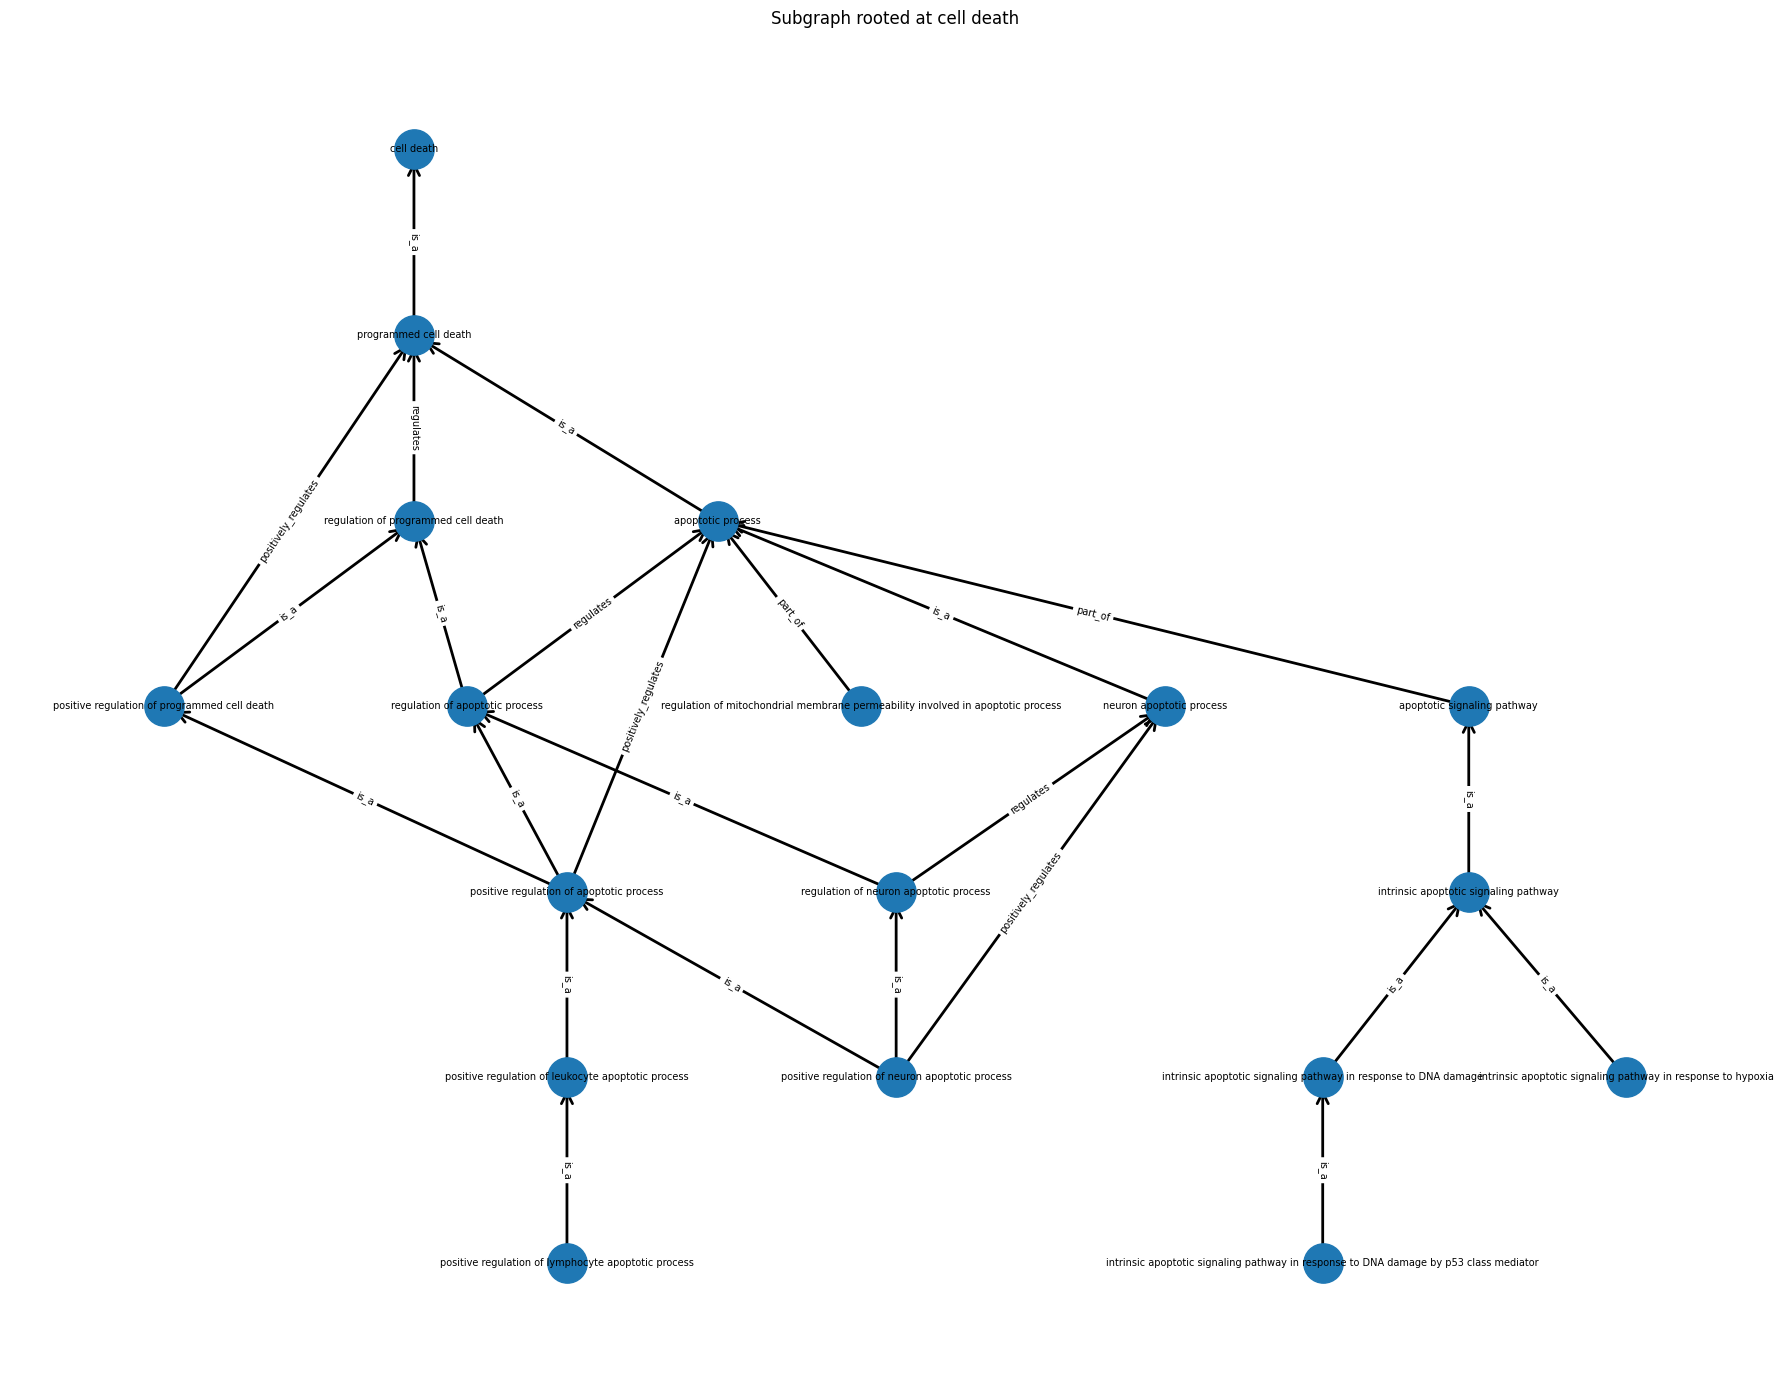

---------
[15] ColorModel({'DNA_damage': 'true', 'EGFR_stimulus': 'true', 'FGFR3_stimulus': 'true', 'TGFBR_stimulus': 'true'})


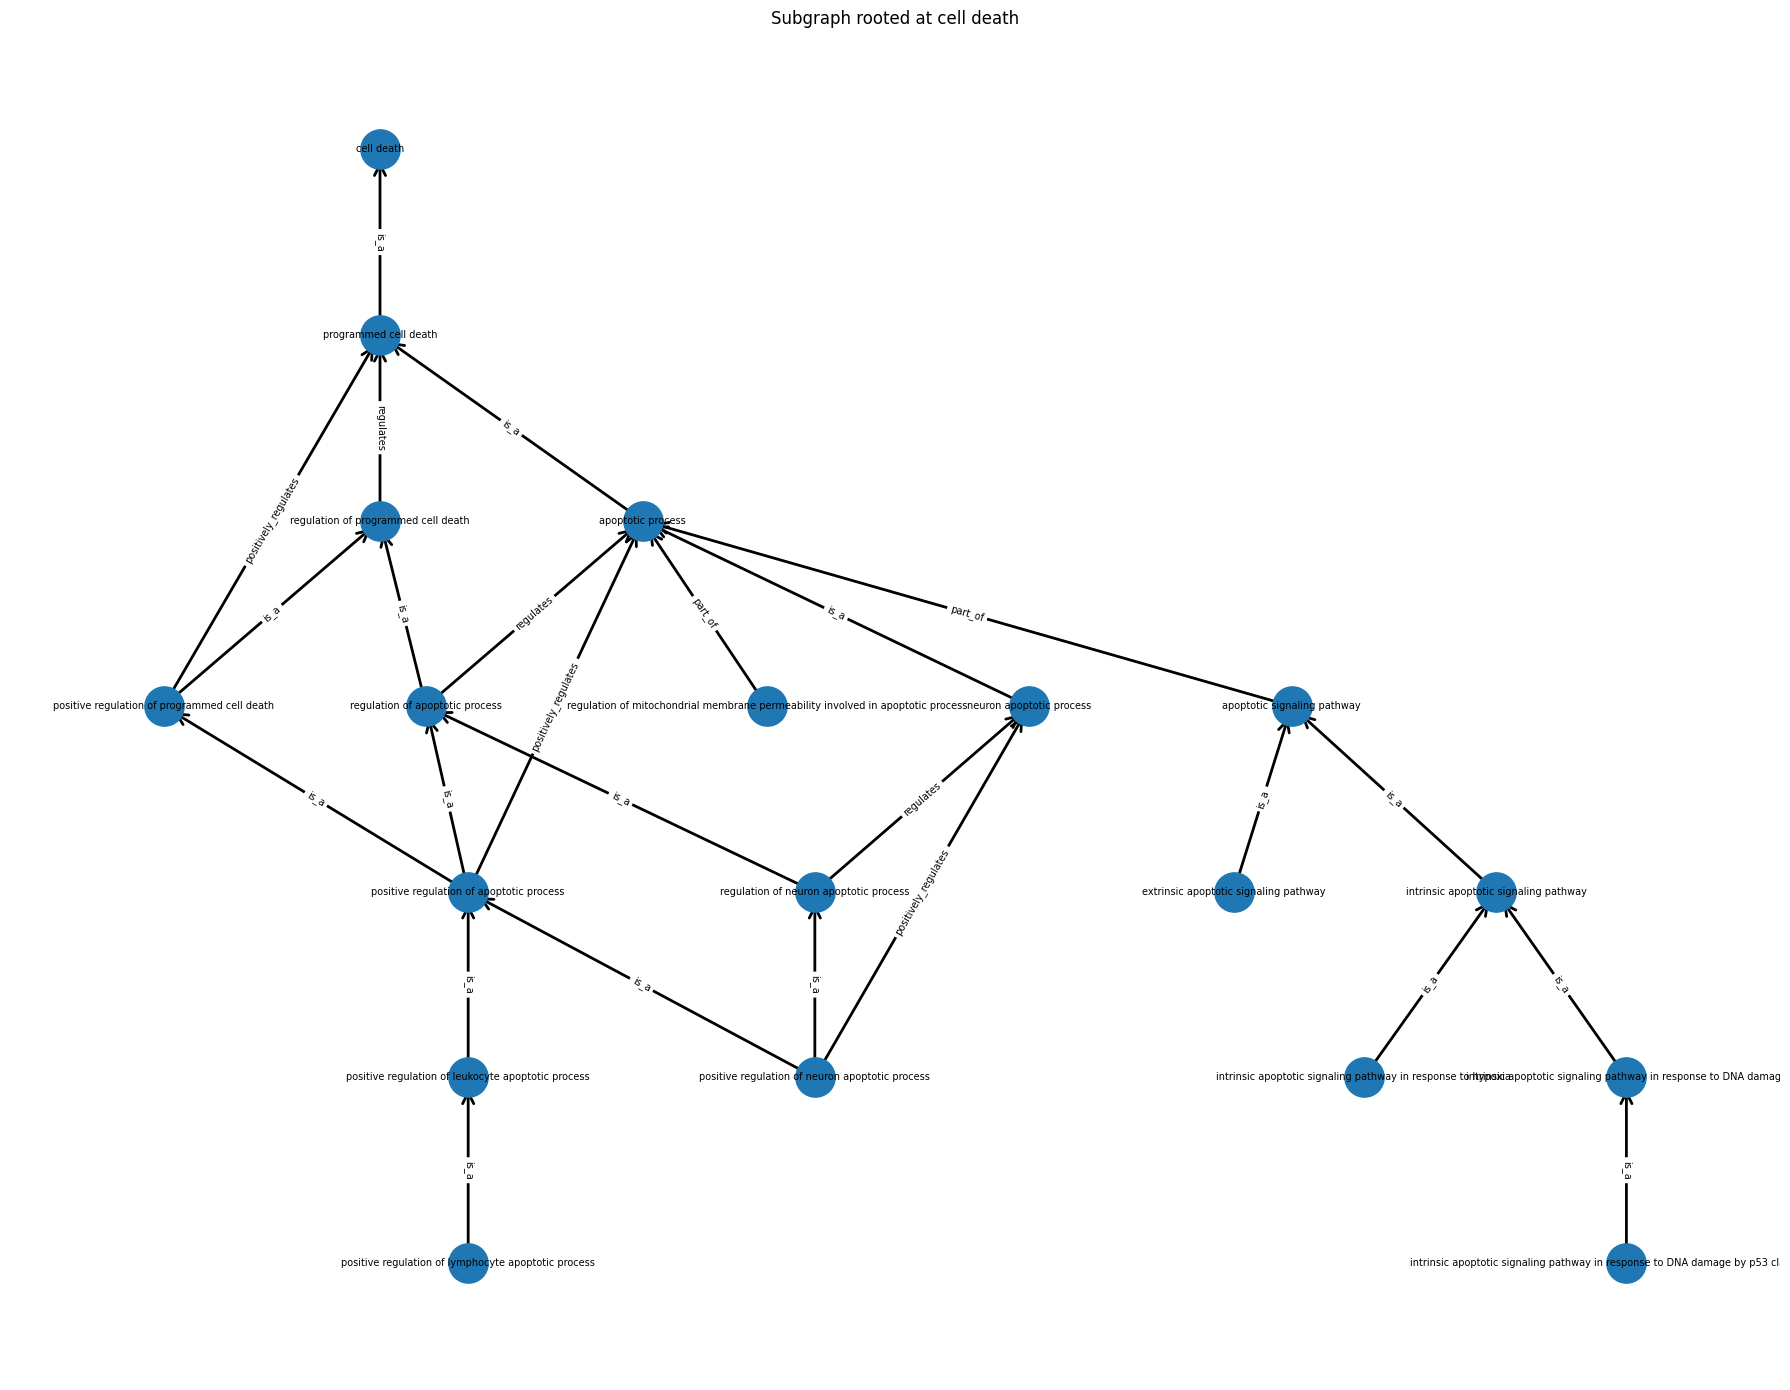

---------


In [23]:
for i, psbn_instance in enumerate(psbn.instances):
    if i != 5 and i != 15:
        continue

    print(f"[{i}] {psbn_instance.color}")

    intersected_goterms = psbn_instance.goterm_intersection()
    set_nodes_for_graph(intersected_goterms)

    roots, leafs = get_roots_and_leafs(intersected_goterms)
    sorted_roots, _ = sort_roots_and_leafs(roots, leafs)

    G = make_graph(intersected_goterms)
    visualize_subgraphs(G, sorted_roots[:1], intersected_goterms)
    print("---------")

## Roots and leafs

These are numbers of roots and leafs per instance.
Roots are the most general terms (biological processes) of subgpraphs and leafs are potentially the most concrete terms(biological processes) of subgraphs.

I restricted visualizing it to only the first few roots and leafs.
Full version is available under the function: ***print_roots_and_leafs_per_instance(psbn)***

In [24]:
for i, psbn_instance in enumerate(psbn.instances):
    goterm_intersection = psbn_instance.goterm_intersection()
    set_nodes_for_graph(goterm_intersection)

    print(f"[{i}] {psbn_instance.color}")

    roots, leafs = get_roots_and_leafs(goterm_intersection)
    sorted_roots, sorted_leafs = sort_roots_and_leafs(roots, leafs)

    print(f"{len(sorted_leafs)} leaves, first few: {sorted_leafs[:2]}")
    print(f"{len(sorted_roots)} roots, first few: {sorted_roots[:3]}")
    print("---------")

[0] ColorModel({'DNA_damage': 'false', 'EGFR_stimulus': 'false', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'})
0 leaves, first few: []
0 roots, first few: []
---------
[1] ColorModel({'DNA_damage': 'true', 'EGFR_stimulus': 'false', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'})
60 leaves, first few: [+cellular response to gamma radiation, +DNA damage response, signal transduction by p53 class mediator]
37 roots, first few: [+response to abiotic stimulus, +cell death, +response to endogenous stimulus]
---------
[2] ColorModel({'DNA_damage': 'false', 'EGFR_stimulus': 'true', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'})
0 leaves, first few: []
0 roots, first few: []
---------
[3] ColorModel({'DNA_damage': 'true', 'EGFR_stimulus': 'true', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'})
72 leaves, first few: [+cellular response to gamma radiation, +DNA damage response, signal transduction by p53 class mediator]
33 roots, first few: [+cell death, +positive r

## Correlations

In [25]:
psbn.count_unmapped_ids_frequencies_in_all_instances()

{'AKT': 1,
 'PI3K': 16,
 'Growth_Arrest': 13,
 'CREB': 13,
 'Apoptosis': 13,
 'JNK': 13,
 'MSK': 13,
 'TAOK': 9,
 'DNA_damage': 9,
 'EGFR_stimulus': 8,
 'FGFR3_stimulus': 8,
 'TGFBR_stimulus': 8,
 'SMAD': 8,
 'TGFBR': 8,
 'RAS': 8,
 'SOS': 8,
 'MAP3K1_3': 8}

In [26]:
psbn.count_mapped_ids_frequencies_in_all_instances()

{'MDM2': 1,
 'PDK1': 16,
 'GAB1': 16,
 'ATF2': 13,
 'ELK1': 13,
 'ATM': 9,
 'GADD45': 13,
 'MAX': 13,
 'PPP2CA': 13,
 'p38': 13,
 'DUSP1': 13,
 'PTEN': 13,
 'p14': 13,
 'MYC': 13,
 'MTK1': 13,
 'p21': 13,
 'AP1': 13,
 'p53': 13,
 'JUN': 13,
 'FOXO3': 13,
 'GRB2': 8,
 'RAF': 8,
 'TAK1': 8}

I printed enriched (active) nodes in each attractor per instance so the correlations are possible to observe

In [27]:
for i, instance in enumerate(psbn.instances):
  print(f"[{i}] {instance.color}")
  for attractor in instance.attractors:
    formatted = "{" + ", ".join(sorted(attractor.enriched_nodes)) + "}"
    print(formatted)
  print("---------")

[0] ColorModel({'DNA_damage': 'false', 'EGFR_stimulus': 'false', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'})
{AKT, GAB1, MDM2, PDK1, PI3K}
{}
---------
[1] ColorModel({'DNA_damage': 'true', 'EGFR_stimulus': 'false', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'})
{AP1, ATF2, ATM, Apoptosis, CREB, DNA_damage, DUSP1, ELK1, FOXO3, GADD45, Growth_Arrest, JNK, JUN, MAX, MSK, MTK1, MYC, PPP2CA, PTEN, TAOK, p14, p21, p38, p53}
{AP1, ATF2, ATM, Apoptosis, CREB, DNA_damage, DUSP1, ELK1, FOXO3, GAB1, GADD45, Growth_Arrest, JNK, JUN, MAX, MSK, MTK1, MYC, PDK1, PI3K, PPP2CA, PTEN, TAOK, p14, p21, p38, p53}
---------
[2] ColorModel({'DNA_damage': 'false', 'EGFR_stimulus': 'true', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'})
{EGFR_stimulus, GAB1, PDK1, PI3K}
---------
[3] ColorModel({'DNA_damage': 'true', 'EGFR_stimulus': 'true', 'FGFR3_stimulus': 'false', 'TGFBR_stimulus': 'false'})
{AP1, ATF2, ATM, Apoptosis, CREB, DNA_damage, DUSP1, EGFR_stimulus, ELK1, FOXO3, GAB1, GA

## Fixed points

In [28]:
print_fixed_points_on_new_stg(network)

Total colors: 16
------
Total colored fixed points: 12
Total fixed point states: 12
Total fixed point colors: 10
------
Fixed point vertices turned on projection (across all colors):
{}
{AP1, ATF2, Apoptosis, CREB, DUSP1, ELK1, FOXO3, GAB1, GADD45, GRB2, Growth_Arrest, JNK, JUN, MAP3K1_3, MAX, MSK, MTK1, MYC, PDK1, PI3K, PPP2CA, PTEN, RAF, RAS, SMAD, SOS, TAK1, TGFBR, TGFBR_stimulus, p14, p21, p38, p53}
{AP1, ATF2, Apoptosis, CREB, DUSP1, EGFR_stimulus, ELK1, FOXO3, GAB1, GADD45, GRB2, Growth_Arrest, JNK, JUN, MAP3K1_3, MAX, MSK, MTK1, MYC, PDK1, PI3K, PPP2CA, PTEN, RAF, RAS, SMAD, SOS, TAK1, TGFBR, TGFBR_stimulus, p14, p21, p38, p53}
{AP1, ATF2, Apoptosis, CREB, DUSP1, ELK1, FGFR3_stimulus, FOXO3, GAB1, GADD45, GRB2, Growth_Arrest, JNK, JUN, MAP3K1_3, MAX, MSK, MTK1, MYC, PDK1, PI3K, PPP2CA, PTEN, RAF, RAS, SMAD, SOS, TAK1, TGFBR, TGFBR_stimulus, p14, p21, p38, p53}
{AP1, ATF2, Apoptosis, CREB, DUSP1, EGFR_stimulus, ELK1, FGFR3_stimulus, FOXO3, GAB1, GADD45, GRB2, Growth_Arrest, JNK, 